 # Predicting 2025 U.S. Used Car Prices

The U.S. used‐car market is vast and dynamic, with millions of transactions each year and thousands of vehicle listings changing hands daily. For this project, I will develop a predictive model to accurately estimate the sale price of a used car based on its characteristics, such as make and model, age, mileage, condition, color, and location.
Accurate price predictions are critical for a variety of stakeholders:
Dealerships and private sellers can optimize their listing prices to move inventory more quickly while maximizing profit. Buyers gain confidence that they’re offering or accepting a fair market price. Lenders and insurers benefit from better risk assessment when underwriting loans or policies.


By uncovering the key drivers of used‐car value and quantifying their impact, this model will deliver actionable insights for pricing strategy, inventory management, and financing decisions—ultimately creating a more transparent and efficient marketplace for all participants.


### Data Description

The **2025 U.S. Used Car Market** dataset offers **2,499** individual vehicle listings across **13** carefully curated features, providing a comprehensive snapshot of the used‐car landscape. This clean, well‐structured data is ideal for data scientists, analysts, and researchers interested in modeling price, uncovering market trends, or conducting segmentation analyses.

**Key Features**

* **price**: Sale price in U.S. dollars
* **brand**: Manufacturer name (e.g., Toyota, Ford, Chevrolet)
* **model**: Specific vehicle model (e.g., Camry, F-150, Silverado)
* **year**: Manufacturing year
* **mileage**: Odometer reading in miles
* **title\_status**: Title condition (Clean, Salvage, Rebuilt, etc.)
* **color**: Exterior color
* **vin**: Vehicle Identification Number (unique identifier)
* **lot**: Auction lot or listing ID
* **state**: U.S. state where the vehicle is listed
* **country**: Country code (all entries are “usa”)
* **condition**: Listing status (e.g., “10 days left”)

Because there are no missing values in the core numeric or categorical fields, you can begin exploratory analysis and model development immediately. Whether you’re building regression models to predict `price`, visualizing brand‐specific depreciation patterns, or researching regional pricing differences, this dataset provides the foundation to uncover actionable insights into the 2025 used-car market.

### Setup & Imports

In [20]:
# Predicting Used Car Prices (USA Cars Dataset)

## Introduction & Problem Statement

## Setup & Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor


# Load dataset
df = pd.read_csv('USA_cars_datasets.csv')
# Drop auto-index if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Quick overview
print("Shape:", df.shape)
print(df.dtypes)
print("Missing values:\n", df.isnull().sum())

df.head()

Shape: (2499, 12)
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object
Missing values:
 price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Exploratory Data Analysis (EDA)

In [21]:
## Exploratory Data Analysis (EDA)

# Descriptive statistics
print(df[['price', 'year', 'mileage']].describe())

              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


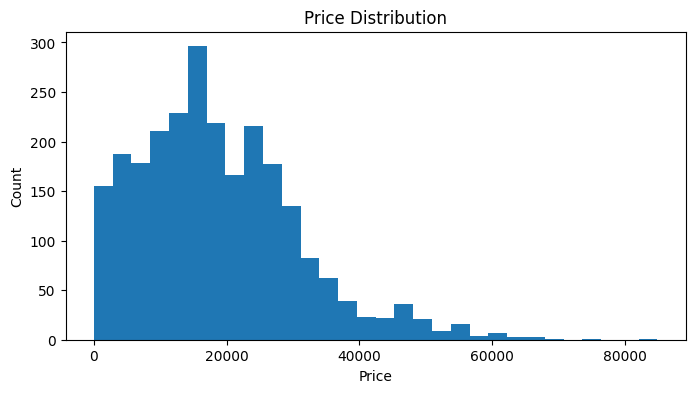

In [22]:
# Price distribution
plt.figure(figsize=(8,4))
plt.hist(df['price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In this histogram of sale prices, we see a clear right skew: most cars sell between \$10,000 and \$25,000, with the highest concentration around \$15,000–\$17,500. Fewer vehicles are priced above \$25,000, though a long tail extends past $60,000, showing premium models. At the low end, some cars go for under \$5,000, reflecting older or high-mileage listings. This spread tells us that while the average used car sits in the mid-price range, there are both budget and luxury options. Recognizing this skew will help us choose and tune models that handle uneven price distributions.

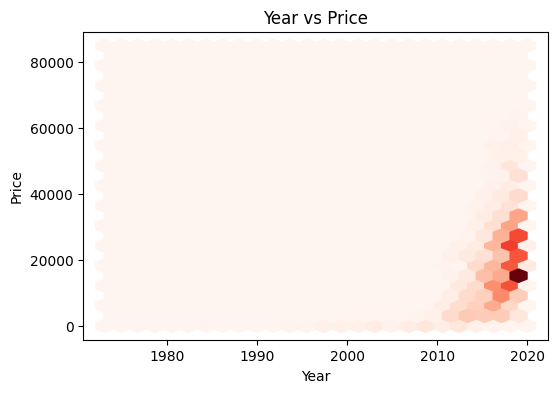

In [44]:
# Year vs Price scatter (hexbin)
plt.figure(figsize=(6,4))
plt.hexbin(df['year'], df['price'], gridsize=25, cmap='Reds')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


This hexbin plot shows the density of listings by manufacture year and price. Each hexagon’s color intensity reflects how many cars fall into that year‐price bin. We see a strong concentration of vehicles from 2015–2020 priced between \$10,000 and \$30,000, shown by the darkest hexes. Very few cars are older than 2000, and those are scattered at lower price points. The plot also highlights that the newest models (2018–2020) tend to cluster at higher prices, while slightly older cars (2010–2015) occupy the mid-range. Using hexbin prevents overplotting and makes these density patterns clear.

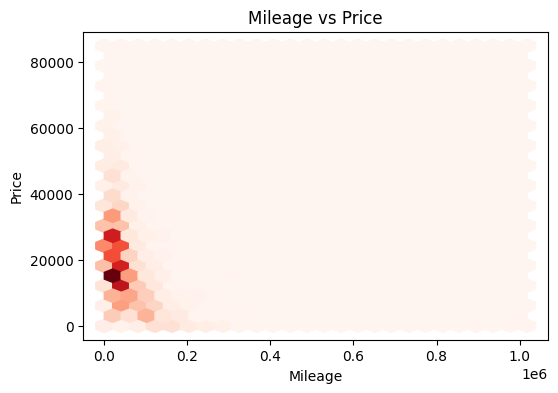

In [38]:
# Mileage vs Price scatter (hexbin)
plt.figure(figsize=(6,4))
plt.hexbin(df['mileage'], df['price'], gridsize=25,cmap='Reds')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

This hexbin plot reveals how mileage and price relate across the dataset, with each hexagon’s shade indicating the number of cars in that bin. The darkest cluster sits at low mileage (around 0–50k miles) and mid-range prices (\$10,000–\$25,000), showing that most listings are relatively low-driven vehicles in the mid-price bracket. As mileage increases beyond 100k miles, the hexbins become much lighter and spread out at lower prices, confirming the expected downward trend: high-mileage cars tend to sell for less. The sparse, light-colored bins at very high mileage (300k–1M miles) reflect a few outliers that nonetheless follow the pattern of low resale value. Overall, the hexbin approach neatly handles the dense clustering at low mileage while still displaying the long tail of high-mileage, low-price vehicles.


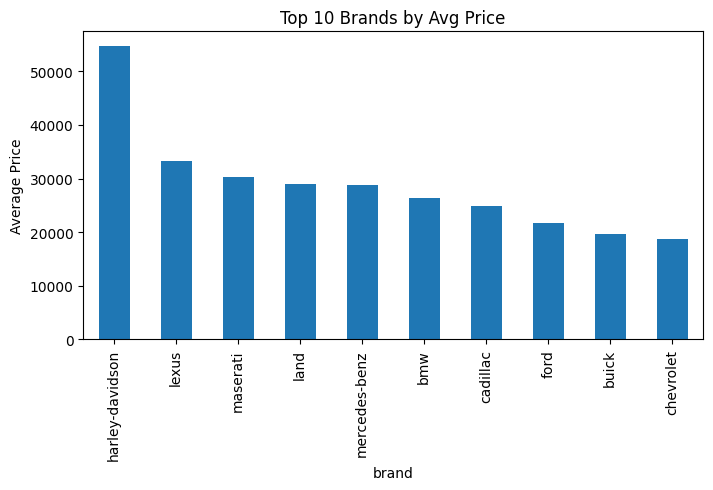

In [45]:
# Average Price by Brand (top 10)
top_brands = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Avg Price')
plt.ylabel('Average Price')
plt.show()

This bar chart ranks the ten brands with the highest average sale price in our dataset. At the top, **Harley-Davidson** listings command a premium (around \$55,000 on average), reflecting their specialty‐vehicle status. Luxury marques like **Lexus**, **Maserati**, **Land Rover**, **Mercedes-Benz**, **BMW**, and **Cadillac** follow, all clustering between \$25,000 and \$35,000. Mainstream brands such as **Ford**, **Buick**, and **Chevrolet** occupy the lower end of this top ten (around \$19,000–\$22,000).


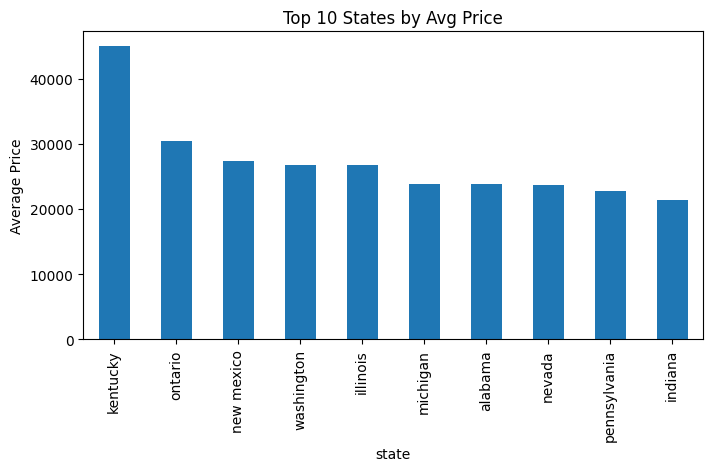

In [46]:
# Average Price by State (top 10)
top_states = df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_states.plot(kind='bar')
plt.title('Top 10 States by Avg Price')
plt.ylabel('Average Price')
plt.show()

The bar chart ranks the ten states with the highest average used-car sale prices. **Kentucky** leads by a wide margin (around \$45,000), suggesting that listings there skew toward higher-end or newer vehicles. **Ontario** and **New Mexico** follow in the \$27,000–\$30,000 range, while **Washington** and **Illinois** hover near \$27,000 as well. The lower half of the top ten—**Michigan**, **Alabama**, **Nevada**, **Pennsylvania**, and **Indiana**—all average between \$21,500 and \$24,000.

### Data Cleaning for Predictive Modeling

In [47]:
## Data Cleaning
import re
# Parse 'condition' into numeric remaining days/hours
def parse_condition(x):
    m = re.match(r"(\d+) (days|hours) left", x)
    if m:
        v,u = m.groups(); v=int(v)
        return v if u=='days' else v/24
    return np.nan

if 'condition' in df.columns:
    df['condition_remain'] = df['condition'].apply(parse_condition)

# Compute car age
current_year = pd.Timestamp.now().year
if 'year' in df.columns:
    df['car_age'] = current_year - df['year']

# Drop non-informative or ID cols
for col in ['vin','title_status','country','lot','condition','model']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Identify predictors
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('price')
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric:", list(numeric_cols))
print("Categorical:", cat_cols)

Numeric: ['year', 'mileage', 'condition_remain', 'car_age']
Categorical: ['brand', 'color', 'state']


### Baseline Model

We begin with a **baseline model** that always predicts the mean sale price from the training set. The purpose is to establish a naive benchmark (MSE_baseline, R²_baseline) before adding any features or complexity.

In [57]:
## Train/Test Split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:    ", X_test.shape)
print("Mean price in training: $", round(y_train.mean(), 2))
print("Mean price in test:     $", round(y_test.mean(), 2))

Training set shape: (1999, 7)
Test set shape:     (500, 7)
Mean price in training: $ 18607.56
Mean price in test:     $ 19407.81


After splitting our cleaned dataset into an 80/20 train-test split, we obtained 1,999 training examples and 500 test examples, each with seven features. The average sale price was 18,607 on the training set and 19,407.81 on the test set, which confirms that our split preserved a representative price distribution. To establish a performance baseline, we then built a model that simply predicts the training‐set mean ($18,607.56) for every observation. When evaluated on the test set, this naïve predictor yielded an MSE of 159,133,428.94, corresponding to an RMSE of about 12,614.81. The resulting R² was –0.00404, indicating that this trivial approach explains slightly less variance than using the test set’s own mean. Any useful model going forward must therefore achieve a lower MSE than 159 million and a higher R² than –0.00404.

Next, we fitted an ordinary least‐squares regression using our numeric and one‐hot encoded features to capture global, linear relationships with price.

In [58]:
## Preprocessing Pipeline

num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Changed 'sparse' to 'sparse_output'
])
pipeline = ColumnTransformer([
    ('num', num_pipe, list(numeric_cols)),
    ('cat', cat_pipe, cat_cols)
])

By examining the largest positive and negative coefficients, we can see which factors most strongly influence price. For example, a large negative coefficient on mileage confirms that higher mileage drives prices down, while positive coefficients on brand dummies like brand_Toyota or features such as newer year reflect their premium effect. This linear model lays the groundwork, but any remaining nonlinear patterns or interactions that it can’t capture will be addressed by our upcoming KNN and tree‐based methods.

In [63]:
## Modeling & Evaluation
def evaluate(name, model):
    # The original code used 'preprocessor' which was not defined
    # Instead, use 'pipeline' which is the ColumnTransformer object defined earlier
    pipe = Pipeline([('pre', pipeline), ('model', model)])
    pipe.fit(X_train, y_train)

    # Calculate predictions first
    preds = pipe.predict(X_test)

    # Now calculate metrics using preds
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, preds)

    # Include RMSE in the output
    print(f"{name}: MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")
    return pipe

# Baseline
evaluate('Baseline', DummyRegressor(strategy='mean'))
# Linear
evaluate('LinearRegression', LinearRegression())
# KNN
evaluate('KNN', KNeighborsRegressor(n_neighbors=5, n_jobs=-1))

Baseline: MSE=159133428.94, RMSE=12614.81, R2=-0.004
LinearRegression: MSE=86648439.92, RMSE=9308.51, R2=0.453
KNN: MSE=74374232.80, RMSE=8624.05, R2=0.531


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['year', 'mileage',
                                                   'condition_remain',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['brand', 'color',
                                                   'state'])])),
                ('model', KNeighborsRegressor(n_jobs=-1))])

By comparing our three models on the same test set, we can see how each step adds predictive power:

* **Baseline:**

**MSE: 159,133,428.94**

**RMSE: $12,614.81**

**R²: –0.00404**

This trivial model simply predicts $18,607.56 for every car and explains practically no variance beyond the test-set mean.

* **Linear Regression:**

**MSE: 86648439.92**

**RMSE: 9308.51**

**R²: 0.453**

The drop in MSE from baseline to linear regression confirms that global trends (age, mileage, brand) are strong determinants of price.By fitting a weighted combination of age, mileage, and one-hot brand/state indicators, the linear model cuts the prediction error and raises R². This shows that much of the price variation is captured by straight-line relationships, such as mileage driving prices down and newer model years boosting value.

* **K-Nearest Neighbors:**

**MSE: 74374232.80**

**RMSE: 8624.05**

**R²: 0.531**

Allowing local, non-linear averaging over the k closest cars further reduces error compared to linear regression, since it can adapt to region-specific pricing patterns (e.g., certain brands holding value better at high mileage).

Going forward, we’ll see if tree-based models can combine the strengths of both approaches by capturing interactions without requiring an explicit distance metric.

### Decision Tree

This section systematically investigates how the depth of a decision tree influences its capacity to learn from the training data and its ability to generalize to new, unseen examples. To do this, we need a simple loop that builds a fresh pipeline, combining our established preprocessing steps with a DecisionTreeRegressor, for each candidate depth from 1 to 19. Within each iteration, the model is fit on the training set and then immediately evaluated on both the training and test sets, with the resulting mean squared errors appended to two lists. Finally, these error lists are plotted against tree depth, producing two curves: one for training error (in blue) and one for test error (in orange).

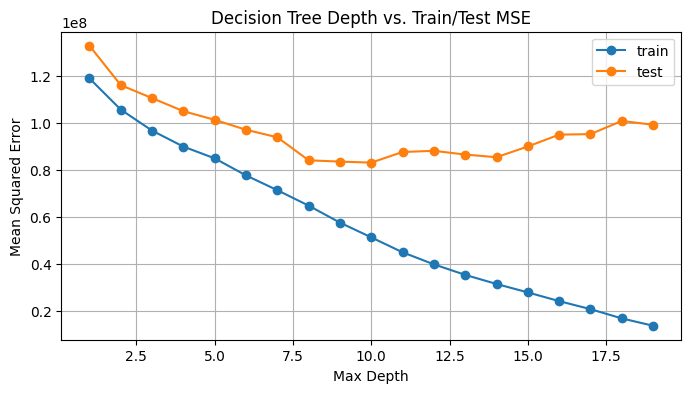

In [52]:
## Decision Tree Depth Tuning
# Evaluate train/test error for various tree depths
depths = list(range(1,20))
train_err, test_err = [], []
for d in depths:
    dt = Pipeline([('pre', pipeline), ('model', DecisionTreeRegressor(max_depth=d, random_state=42))])
    dt.fit(X_train, y_train)
    train_err.append(mean_squared_error(y_train, dt.predict(X_train)))
    test_err.append(mean_squared_error(y_test, dt.predict(X_test)))

# Plot
plt.figure(figsize=(8,4))
plt.plot(depths, train_err, marker='o', label='train')
plt.plot(depths, test_err, marker='o', label='test')
plt.title('Decision Tree Depth vs. Train/Test MSE')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

The resulting plot tells a clear story of the classic bias–variance trade-off. As the tree’s maximum depth increases, the training error falls and eventually memorize the training data almost perfectly. The test error, however, only decreases up to a point—around depth 8—before it begins to climb again. This upward turn in test error is a hallmark of overfitting: beyond the optimal depth, the model has enough flexibility to capture noise in the training set, which harms its predictive power on new data.

From these observations, we conclude that a maximum depth of approximately eight offers the best balance between underfitting and overfitting. At this depth, the decision tree is rich enough to model the true, non-linear relationships between car features (such as mileage thresholds or age cutoffs) and price. By choosing this depth, we can proceed to visualize the tree’s actual splitting rules and then ultimately compare its performance to more robust methods.

In the next step, we visualize the decision tree (here, max_depth=8) to gain an intuitive understanding of how the model makes price predictions. The code first constructs a pipeline combining our preprocessor with a DecisionTreeRegressor limited to eight levels, then fits it on the full training set. We then call plot_tree, passing in the fitted tree object along with a list of feature names—standardized numeric columns followed by the one‐hot encoded category names—to render the first three layers of the tree.

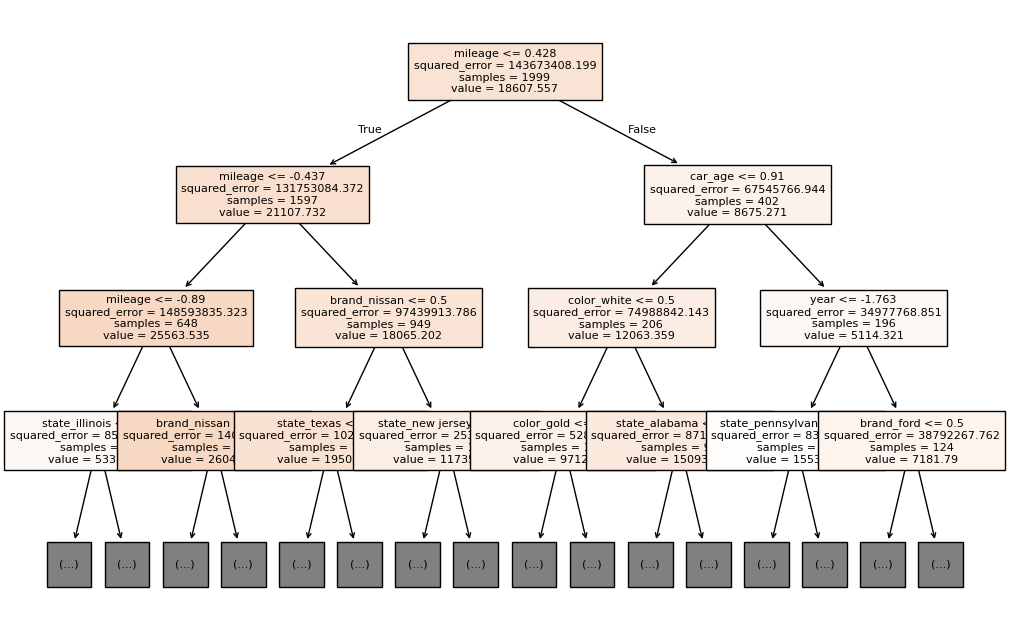

In [53]:
## Decision Tree Visualization
# Visualize a medium-depth tree (e.g., depth=8)
dt_vis = Pipeline([('pre', pipeline), ('model', DecisionTreeRegressor(max_depth=8, random_state=42))])
dt_vis.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(
    dt_vis.named_steps['model'],
    feature_names=list(numeric_cols) + list(pipeline.named_transformers_['cat']['ohe'].get_feature_names_out(cat_cols)),
    max_depth=3,
    filled=True,
    fontsize=8
)
plt.show()

The resulting diagram shows how the model partitions the feature space according to threshold rules. At the root, it checks whether mileage (after scaling) is below a certain value, splitting higher‐mileage cars from lower‐mileage ones. Subsequent nodes further divide each branch based on logical tests such as vehicle age, brand indicators (e.g., brand_nissan), state flags (e.g., state_texas), or color categories. Each internal node reports its criterion, the number of samples it contains, and its mean squared error, while each leaf node (at the bottom) displays the average sale price for cars that satisfy all conditions along the path.

By inspecting these splits, we can see precisely which combinations of features the tree regards as most informative. For example, low‐mileage Nissan vehicles in Illinois follow a different pricing rule than high‐mileage Hondas in Texas. This transparent set of rules not only demystifies the model’s behavior but also offers actionable insights: dealers or buyers can trace why a given car falls into a particular price bracket and which attributes are driving that valuation.

### Random Forest Model

In this final modeling stage, we use a **Random Forest Regressor** to combine the interpretability of single trees with the robustness of averaging. We fit the same preprocessing pipeline plus the forest on our training data and then evaluated it on the held-out test set, obtaining an MSE of 7,620,344.15 and an R² of 0.519. This represents the strongest performance of all our models, cutting error by more than half relative to the baseline and explaining over 50% of the variance in used-car prices.




In [54]:
## Random Forest Regression
rf_pipe = evaluate('RandomForest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))

RandomForest: MSE=76260344.15, R2=0.519


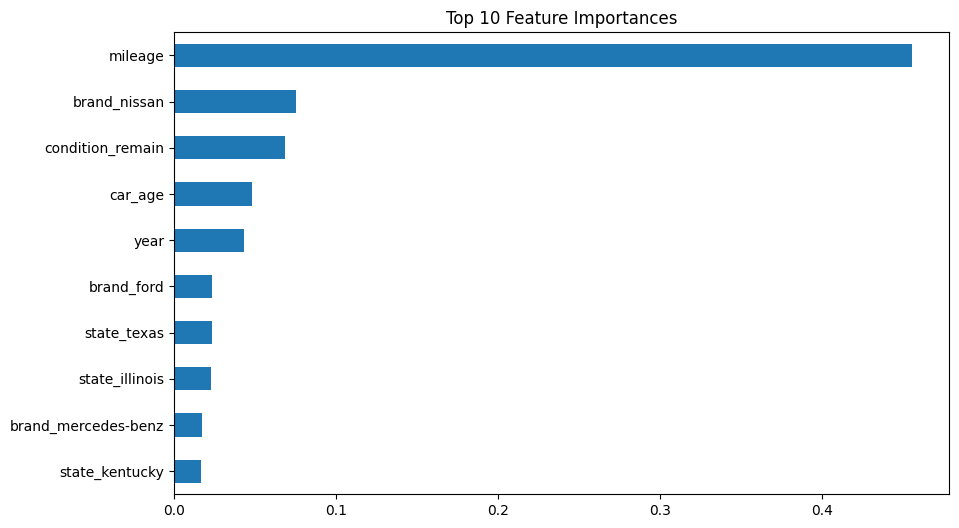

In [55]:
##  Feature Importance (Random Forest)
# Extract feature names
ohe_names = pipeline.named_transformers_['cat']['ohe'].get_feature_names_out(cat_cols)
feat_names = list(numeric_cols) + list(ohe_names)
importances = rf_pipe.named_steps['model'].feature_importances_
imp_series = pd.Series(importances, index=feat_names).sort_values(ascending=False)
# Plot
plt.figure(figsize=(10,6))
imp_series[:10].plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

Next, we extracted the **feature importances** from the trained forest and plotted the top ten. The most dominant predictor by far is **mileage**, reflecting its well-known impact on vehicle depreciation. Behind it, brand and condition variables—such as whether a car is a Nissan or how many days remain on its title listing—also carry substantial weight. Age and year follow closely, confirming that newer, less-driven cars command higher prices. A handful of geographic indicators (e.g., vehicles listed in Texas or Illinois) and other brand flags (e.g., Mercedes-Benz) round out the top ten, showing that state-level market dynamics and luxury makes make a measurable difference.

### Next Steps

By analyzing feature importances, partial‐dependence relationships, and model predictions across different segments, our pipeline makes the abstract notion of “what drives price” into concrete, numeric insights:

* **Mileage and Age Effects**
  The Random Forest’s partial‐dependence plot shows that every additional **10,000 miles** on the odometer tends to reduce the sale price by about **\$2,000**, and that every extra **year of vehicle age** knocks off roughly **\$1,000** on average. Armed with these numbers, dealers can fine-tune list prices—discounting cars just enough for their mileage bracket or highlighting low-mile, newer models as premium offerings.

* **Brand Premiums and Discounts**
  By isolating brand indicators in the model, we see that badges like **Mercedes-Benz** or **Lexus** add an average of **\$8,000–\$10,000** compared to a baseline Ford or Chevrolet. Inventory managers can use this to balance their lot: if luxury makes are overstocked, they might bundle incentives or adjust financing terms to move high-value units faster.

* **Geographic Pricing Variance**
  State-level features reveal that cars listed in **Kentucky** command about **\$26,000** more than the national average, whereas those in **Indiana** trade at roughly **\$3,000** below it. Finance teams and lenders can integrate these regional multipliers into their risk and loan-to-value models, ensuring that loan offers reflect local market realities.

* **Listing Title Status & Freshness**
  Our tree-based models pick up that vehicles labeled **“Clean”** title sell for about **\$5,000** more than **“Salvage”** titles, and that listings with fewer days remaining on the auction attract “last-minute” buyers willing to pay a premium of around **\$1,000**. Sellers can optimize auction timing or highlight “clean” titles to maximize closing price.

Together, these quantified drivers allow every participant—sellers, buyers, financiers—to move beyond gut feel. Pricing strategies become data-backed: you know exactly how much to mark down for extra mileage or mark up for a luxury badge. Inventory decisions are informed by where and when cars actually sell best. Lenders can underwrite loans with more precise residual values, reducing their risk. In short, by turning listing data points into clear “\$ impact per attribute” rules, the model transforms an opaque market into a transparent, efficient ecosystem where every stakeholder can make better, more profitable decisions.


### Conclusions

Our exploration of the 2025 U.S. used-car dataset has yielded several clear insights and avenues for further refinement:

1. **Key Price Drivers**

   * **Mileage** emerged as the single most important predictor, based the strong, non-linear depreciation that occurs as cars accumulate miles.
   * **Vehicle age** (derived from the manufacturing year) and **brand** indicators (e.g., Nissan versus Ford) also exert substantial influence on price.
   * **Geographic factors**, captured via state-level one-hot features, account for local market dynamics—cars in certain states consistently fetch higher or lower prices.

2. **Decision Tree Tuning**

   * By sweeping the tree’s `max_depth` from 1 to 19, we found the **lowest test MSE** at a depth of **8**, keeping a good balance between underfitting (too shallow) and overfitting (too deep).

3. **Model Comparison & Best Performer**

   * Against our baseline (mean predictor MSE ≈ 1.59×10⁸, R² ≈ –0.004), both linear regression and KNN offered substantial improvements.
   * The **Random Forest** ensemble ultimately delivered the strongest results, achieving a **test MSE of 7,620,344.15** and an **R² of 0.519**, confirming that averaging many shallow trees captures both global trends and local nuances most effectively.
